In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
#from wordcloud import WordCloud


# Introdução

2020 será certamente recordado como o ano que veio separar o "antes" e o "depois" na forma como a maioria das sociedades opera e no quotidiano de milhões de pessoas.
A chegada e permanência da pandemia Corona Virús a Portugal veio alterar a forma como vivemos. Foi um ano em que o governo teve que assumir medidas restritivas e contestáveis, em que palavras como quarentena e confinamento se tornaram parte do quotidiano e nos habituámos a usar máscaras.
Esta análise, realizada no âmbito da organização Data Science for Social Good Portugal, pretende a analisar de que forma os portugueses reagiram tanto às medidas implementadas pelo Governo como às notícias publicadas durante o período de Janeiro a Julho.

Os dados relativos às reacções dos Portugueses têm por base os tweets publicados durante o período da análise e onde tenha havido uma mencão ao vírus no texto ou no hashtag da publicação

As notícias foram retiradas dos websites do Público e Observador e as medidads governamentais do XXX. 

Tanto as publicações no Twitter como os títulos e descrições das notícias foram submetidas a uma análise de sentimento  uma técnica de Machine Learning. Para mais informação sobre os aspectos técnicos desta análise, #clique aqui#


In [2]:
news = pd.read_csv('noticias_en_classification.csv')
tweets = pd.read_csv('tweets_en_classification.csv')
#medidas = pd.read_csv('medidas_governamentais.csv', header = None, names = ["data","local","tipo","descrição"])


In [3]:
news.head()

,Unnamed: 0,data,titulo,descricao,source,titulo_clean,titulo_en,classification,score,descricao_clean,descricao_en,descricao_classification,descricao_score
0,0,2020-06-30,Ex-ministro da Saúde Correia de Campos alerta ...,"“Preparemo-nos para o que aí vem”, avisou o an...",publico,Ex-ministro da Saúde Correia de Campos alerta ...,Former Health Minister Correia de Campos warns...,NEGATIVE,0.947701,"“ Preparemo-nos para o que aí vem ” , avisou o...","“Let us prepare for what is coming”, warned th...",NEGATIVE,0.937429
1,1,2020-06-30,Estados Unidos compram quase todo o <i>stock</...,A compra das mais de 500 mil doses do medicame...,publico,Estados Unidos compram quase todo o stock de r...,United States buys almost all stock of remdesivir,NEGATIVE,0.852459,A compra das mais de 500 mil doses do medicame...,The purchase of more than 500 thousand doses o...,POSITIVE,0.849041
2,2,2020-06-30,Governo admite quarentena para hotéis com cont...,Hóspedes e funcionários também poderão ficar d...,publico,Governo admite quarentena para hotéis com cont...,Government admits quarantine for hotels with c...,NEGATIVE,0.983680,Hóspedes e funcionários também poderão ficar d...,Guests and staff may also be quarantined in th...,NEGATIVE,0.960382
3,3,2020-06-30,Covid-19: quem quer ajudar os cientistas a seg...,A perda de olfacto é um dos sintomas comuns as...,publico,Covid-19 : quem quer ajudar os cientistas a se...,Covid-19: who wants to help scientists track t...,NEGATIVE,0.998983,A perda de olfacto é um dos sintomas comuns as...,Loss of smell is one of the common symptoms as...,NEGATIVE,0.992243
4,4,2020-06-30,"Profissionais do SNS “não deram o litro, deram...","O documento foi apresentado no Infarmed, em Li...",publico,"Profissionais do SNS “ não deram o litro , der...","SNS professionals “did not give the liter, the...",NEGATIVE,0.962007,"O documento foi apresentado no Infarmed , em L...","The document was presented at Infarmed, in Lis...",NEGATIVE,0.998898


In [4]:
tweets.head()

,Unnamed: 0,Unnamed: 0.1,id,date,username,text,hashtag,geo,text_clean,text_en,classification,score
0,0,0,1213243065336582144,2020-01-03 23:37:42+00:00,adreciclarte,Olha que o Corona também está a ficar bonzinho...,NaN,NaN,Olha que o Corona também está a ficar bonzinho...,"Look, Corona is also looking good. If they let...",POSITIVE,0.999872
1,1,1,1213599942444539906,2020-01-04 23:15:48+00:00,food_i_do,Que escândalo! Parece que só agora é que o árb...,NaN,NaN,Que escândalo ! Parece que só agora é que o ár...,What a scandal! It seems that it is only now t...,NEGATIVE,0.996998
2,2,2,1213939014488788992,2020-01-05 21:43:09+00:00,CRbeiro,Corona meu mexicanozinho tu és do caralho pa!!...,NaN,NaN,Corona meu mexicanozinho tu és do caralho pa !...,Corona my little mexican you are fucking aweso...,POSITIVE,0.999818
3,3,3,1213891469771247621,2020-01-05 18:34:14+00:00,dudzs16,Não temos a jogar um caralho. A substituição d...,NaN,NaN,Não temos a jogar um caralho . A substituição ...,We don't have to play a fuck. Pepe's replaceme...,NEGATIVE,0.998038
4,4,4,1213890252374466562,2020-01-05 18:29:23+00:00,luisgomes__10,"Digo e volto a dizer, o Corona não pode jogar ...",NaN,NaN,"Digo e volto a dizer , o Corona não pode jogar...","I say and say again, Corona cannot play the side",NEGATIVE,0.997583


In [5]:
# dealing with time

In [6]:
news["date"] = pd.to_datetime(news["data"], errors = "coerce", dayfirst = True).dt.tz_localize(None)

In [7]:
news.date

0       2020-06-30
1       2020-06-30
2       2020-06-30
3       2020-06-30
4       2020-06-30
           ...    
37588   2020-06-30
37589   2020-06-30
37590   2020-06-30
37591   2020-06-30
37592   2020-06-30
Name: date, Length: 37593, dtype: datetime64[ns]

In [8]:
tweets["date"] = pd.to_datetime(tweets["date"], errors = "coerce", dayfirst = True).dt.tz_localize(None)

In [9]:
tweets.date

0       2020-01-03 23:37:42
1       2020-01-04 23:15:48
2       2020-01-05 21:43:09
3       2020-01-05 18:34:14
4       2020-01-05 18:29:23
                ...        
21135   2020-06-30 12:22:14
21136   2020-06-30 11:58:18
21137   2020-06-30 11:36:07
21138   2020-06-30 10:43:00
21139   2020-06-30 16:50:56
Name: date, Length: 21140, dtype: datetime64[ns]

In [10]:
#medidas['data'] = pd.to_datetime(medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)


##### Date ranges are different for each dataset
As a solution for this, will have to standardize.

In [11]:
print("News min date",news.data.min())
print("News max date",news.data.max())

print("Tweets min date",tweets.date.min())
print("Tweets max date",tweets.date.max())

News min date 2020-01-21
News max date 2020-06-30
Tweets min date 2020-01-03 23:37:42
Tweets max date 2020-08-19 06:16:55


In [12]:
start_date = "2020-01-21"
end_date = "2020-06-30"

news_2 = news[(news["data"]>= start_date) & (news["data"]<= end_date)]
tweets_2 = tweets[(tweets["date"]>= start_date) & (tweets["date"]<= end_date)]

In [13]:
# to add medidas to graphs
#df_medidas = medidas[(medidas['tipo'] != 'Medidas') &
#           (medidas['tipo'] != 'Desconfinamento') &
#           (medidas['local'] == 'Portugal')]


### News and Tweets Frequency over time

In [14]:
# changing name of column for plotting easily
news_2["date"] = news_2.data

In [15]:
news_2["date"] = pd.to_datetime(news_2['date'])

In [16]:
news_2.date

0       2020-06-30
1       2020-06-30
2       2020-06-30
3       2020-06-30
4       2020-06-30
           ...    
37588   2020-06-30
37589   2020-06-30
37590   2020-06-30
37591   2020-06-30
37592   2020-06-30
Name: date, Length: 37593, dtype: datetime64[ns]

In [17]:
tweets_2["date2"] = pd.to_datetime(tweets_2['date']).dt.date

<ipython-input-17-b041dea49e57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2["date2"] = pd.to_datetime(tweets_2['date']).dt.date


In [18]:
tweets_2.date = pd.to_datetime(tweets_2['date2'])

/Users/rbr8095/projects/personal/miniproject-sentimentanalysis-covid/venv/lib/python3.8/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


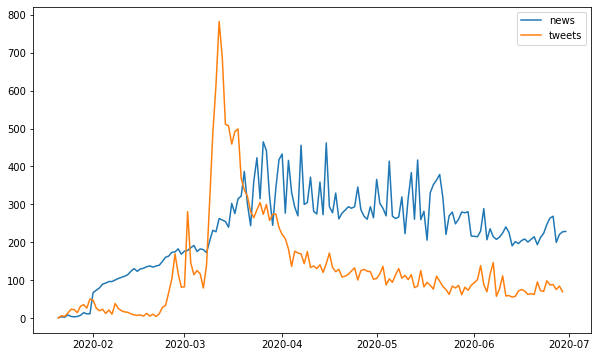

In [19]:
fig = plt.figure(figsize=(10,6))


for frame in [news_2,tweets_2]:
    plt.plot(frame["date"].value_counts().sort_index())

plt.legend(("news","tweets"))
plt.show()

NameError: name 'df_medidas' is not defined

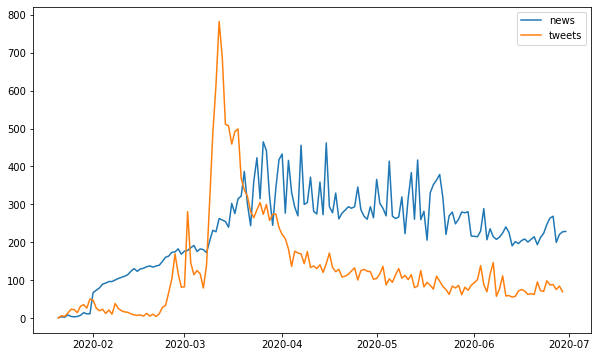

In [20]:
fig = plt.figure(figsize=(10,6))


for frame in [news_2,tweets_2]:
    plt.plot(frame["date"].value_counts().sort_index())

plt.legend(("news","tweets"))
for row_id, row_values in df_medidas.iterrows():
    plt.axvline(row_values["data"],color="gray")
plt.show()

- 2 de Março, primeiro caso em Portugal de COVID-19, parece haver um pico de reacções no Twitter, mais do que nas notícias
- o crescimento de notícias relacionado com o COVID-19 cresce de forma estável durante Março
- enquanto que as reacções no Twitter parecem ser mais instáveis. Por exemplo, em antecipação ao decreto do estado de alerta parece haver muita "agitação", mas após esse decreto esse pico decresce ao longo do tempo de forma sustentada. 
- Também podemos ver enquanto que os posts no Twitter vão diminuindo a meio de Março, as notícias relacionadas com o COVID - 19 vão subindo. 
- A partir do meio de Março, vemos que há mais notícias do que tweets relacionados com a pandemia (*** de acordo com o nosso dataset que tem vários "caveats")
- O fim do confinamento obrigatório (3-05-2020 Decretado estado de Calamidade após Estado de Emergência), o número de notícias volta a subir após um descréscimo visível nas duas semanas anteriores.

### Most used words in the news

In [21]:
stopwords = stopwords.words('portuguese')


In [ ]:
news["title_cleaned"] = news['titulo'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
news["title_cleaned"].head()

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate("".join(news["title_cleaned"])) 

plt.imshow(wordcloud)

#### Most used words by the media in February

In [ ]:
# changing to datetime again
news["date"] = pd.to_datetime(news["data"], errors = "coerce", dayfirst = True).dt.tz_localize(None)

tweets["date"] = pd.to_datetime(tweets["date"], errors = "coerce", dayfirst = True).dt.tz_localize(None)

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 20).generate("".join(news[news["date"].dt.month==2]["title_cleaned"])) 

plt.imshow(wordcloud)

- Início da pandemia ("origem")
- casos suspeitos
- ainda se associa a Wuhan
- preocupação em retirar cidadãos (portugueses de outros países?)
- as fronteiras a fechar ...

#### Most used words by the media in March

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 20).generate("".join(news[news["date"].dt.month==3]["title_cleaned"])) 

plt.imshow(wordcloud)

- Mês em que o governo tem de tomar decisões
- Medidas são implementadas
- "tempo" em "casa"
- Surge a palavra "quarentena", "isolamento" e "teste"
- Com a quarentena, surgem os "apoios" como se vê no wordcloud

#### Most used words by the media in Abril

In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 20).generate("".join(news[news["date"].dt.month==4]["title_cleaned"])) 

plt.imshow(wordcloud)

- A palavra "máscara" surge, talvez por se começar a antecipar o fim da quarentena

#### Most used words by the media in May


In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 20).generate("".join(news[news["date"].dt.month==5]["title_cleaned"])) 

plt.imshow(wordcloud)

#### Most used words by the media in June


In [ ]:
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 20).generate("".join(news[news["date"].dt.month==6]["title_cleaned"])) 

plt.imshow(wordcloud)

- Em Junho, mais casos aparecem na zona Área Metropolitana de Lisboa

### News and Tweets Sentiment over time

In order to analyse the data, Positive and Negative classification of tweets and news were "transformed" to a numerical format, 1 for positive and -1 for negative. This will allow us to calculate which days were "more positive" or "less positive"

In [22]:
tweets_2["numerical_class"] = np.where(tweets_2["classification"]=="POSITIVE",1,-1)

<ipython-input-22-70dc8b6d5a6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2["numerical_class"] = np.where(tweets_2["classification"]=="POSITIVE",1,-1)


In [23]:
news_2["numerical_class"] = np.where(news_2["classification"]=="POSITIVE",1,-1)

In [24]:
def plot_sentiment(df,

                   date_name,

                   classification_name,

                   freq,
                    color,

                   agg_name='mean',

                   fig_size=(13, 5),

                   plot_type='line',


                   plot_zero_line=False):

    df.groupby(pd.Grouper(key=date_name, freq=freq))[classification_name].agg(agg_name).plot(figsize=(20,10), kind=plot_type
                                                                                            ,color = color) 

    if plot_zero_line:

        plt.axhline(y=0.0, linestyle='-')

        
# about frequency --> https://pandas.pydata.org/docs/user_guide/timeseries.html

#### Sentiment - Monthly 


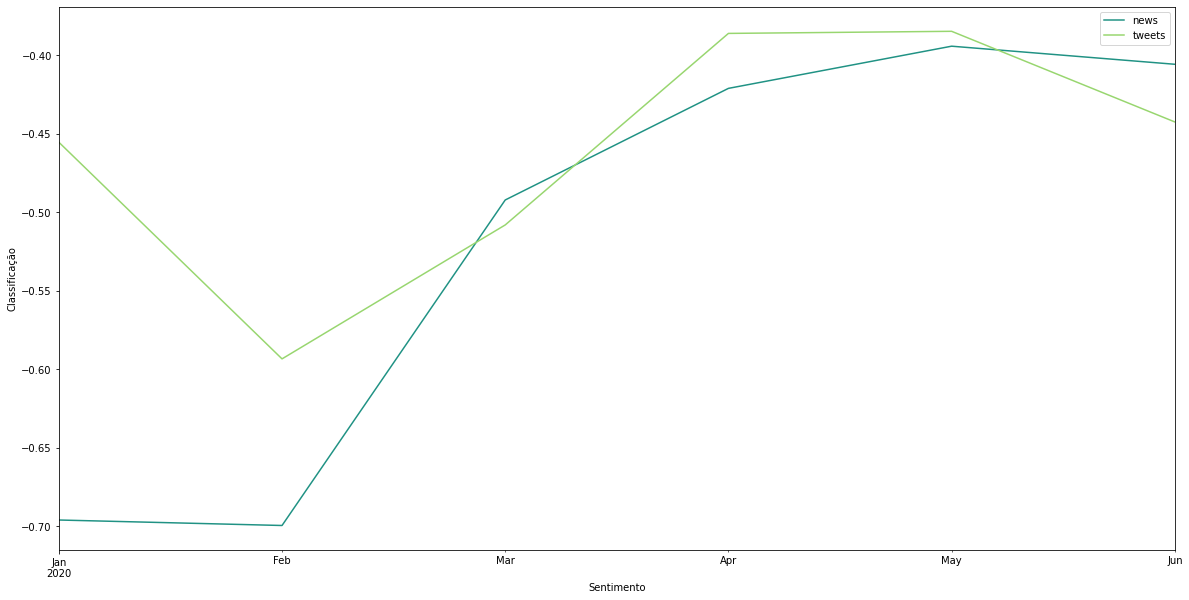

In [25]:
plot_sentiment(news_2, "date", "numerical_class", "M", color= "#209284")
plot_sentiment(tweets_2, "date","numerical_class", "M", color = "#98d66f")

plt.ylabel("Classificação")
plt.xlabel("Sentimento")
plt.legend(["news","tweets"])

plt.show()

#### Sentiment - Weekly

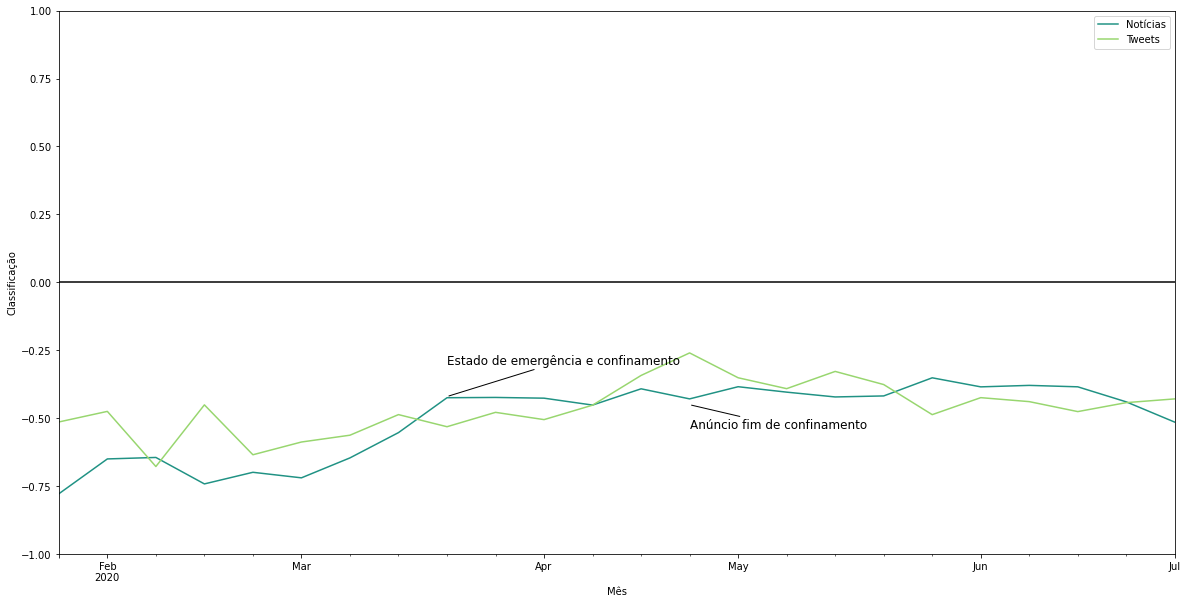

In [26]:
fig, ax = plt.subplots(figsize=(15,12))

plot_sentiment(news_2, "date", "numerical_class", "W", color= "#209284")
plot_sentiment(tweets_2, "date","numerical_class", "W", color = "#98d66f")

plt.ylabel("Classificação")
plt.xlabel("Mês")
plt.legend(["Notícias","Tweets"])
#for row_id, row_values in df_medidas.iterrows():
    #plt.axvline(row_values["data"],color="gray")
#ax.set_xticklabels(( " ","Janeiro",'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'))

ax.annotate('Estado de emergência e confinamento',
            ('2020-03-18', -0.42), ('2020-03-19', -0.3),
            arrowprops=dict(arrowstyle='-'),size=12
            )

ax.annotate('Anúncio fim de confinamento',
            ('2020-04-22', -0.45), ('2020-04-23', -0.55),
            arrowprops=dict(arrowstyle='-'),horizontalalignment='left',
            verticalalignment='bottom',
            size=12
            
            )
plt.ylim(-1, 1)
ax.axhline(0, color='black')
            
            
plt.show()

In [ ]:
def plot_sentiment_vertical(df,
                            date_name,
                            classification_name,
                            freq,
                            color,
                            agg_name='mean',
                            fig_size=(13, 5),
                            plot_type='line',
                            plot_zero_line=False):

    df.groupby(pd.Grouper(key=date_name, freq=freq))[classification_name].agg(agg_name).plot(figsize=(20,10), kind=plot_type, color = color) 

    if plot_zero_line:
        plt.axhline(y=0.0, linestyle='-')

        
# about frequency --> https://pandas.pydata.org/docs/user_guide/timeseries.html

In [40]:
df_to_plot = news_2.groupby(pd.Grouper(key="date", freq="W"))["numerical_class"].agg('mean')
df_to_plot_2 = tweets_2.groupby(pd.Grouper(key="date", freq="W"))["numerical_class"].agg('mean')

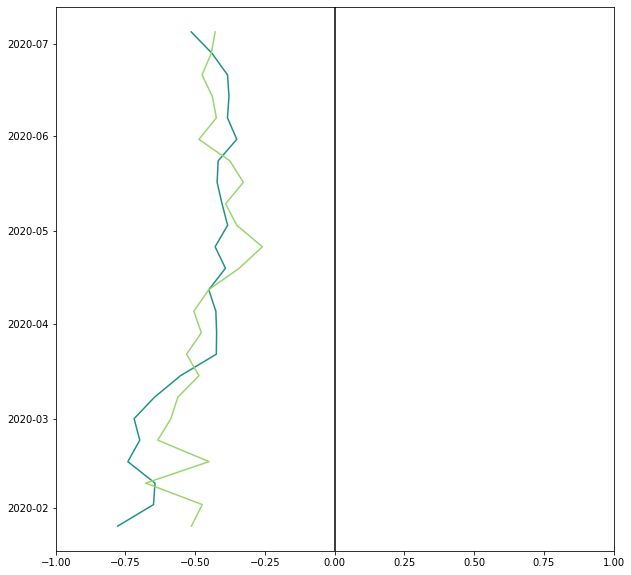

In [47]:
plt.figure(figsize=(10,10))
plt.plot(df_to_plot.values, df_to_plot.index, color="#209284")
plt.plot(df_to_plot_2.values, df_to_plot_2.index, color="#98d66f")
plt.xlim(-1, 1)
plt.axvline(0, color='black')

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))

plot_sentiment(news_2, "date", "numerical_class", "W", color= "#209284")
plot_sentiment(tweets_2, "date","numerical_class", "W", color = "#98d66f")

plt.ylabel("Classificação")
plt.xlabel("Mês")
plt.legend(["Notícias","Tweets"])
#for row_id, row_values in df_medidas.iterrows():
    #plt.axvline(row_values["data"],color="gray")
#ax.set_xticklabels(( " ","Janeiro",'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho'))

ax.annotate('Estado de emergência e confinamento',
            ('2020-03-18', -0.42), ('2020-03-19', -0.3),
            arrowprops=dict(arrowstyle='-'),size=12
            )

ax.annotate('Anúncio fim de confinamento',
            ('2020-04-22', -0.45), ('2020-04-23', -0.55),
            arrowprops=dict(arrowstyle='-'),horizontalalignment='left',
            verticalalignment='bottom',
            size=12
            
            )
plt.ylim(-1, 1)
ax.axhline(0, color='black')
            
            
plt.show()

In [ ]:
news_2.date

- O estado de alerta é decretado dia 13 de Março e o estado de emergência no dia 18 de Março, estes dois acontecimentos aparentam ter tido um impacto positivo no sentimento das notícias. Talvez uma forma dos meios de comunicação social quererem transmitir confiança nas medidas tomadas(?)
- Já no Twitter, as o anúncio do estado de alerta pode ter tido um efeito negativo, com a classificação do sentimento a baixar (x%) imediatamente após a data. O contrário aconteceu após o estado de emergência ter sido decretado, com a classificação de sentimento a subir novamente para  mesmo valor imediatamente antes do anúncio dos decretos.
- O pico no sentimento dos tweets no fim de Abril, pode estar relacionado com o anúncio do fim do confinamento (publicado no dia 22 de Abril https://www.portugal.gov.pt/pt/gc22/comunicacao/noticia?i=governo-apresenta-calendario-de-desconfinamento-no-final-de-abril), mas o anúncio oficial foi feito dia 30 de Abril. 
- É curioso observar que o sentimento das notícias é mais estável do que o sentimento dos tweets.

In [ ]:
medidas[20:]

In [ ]:
df_medidas

![alt text](../plot_sentiment_changes.png)

![alt text](../table_sentiment_changes.png "Title")